In [2]:
# Step 1: Import your CRM process class
from process_bigraph import ProcessTypes, Composite, register_types
from vCRM.classical_CRM_v2 import CRM, plot_crm_simulation, get_crm_emitter
from process_bigraph.emitter import gather_emitter_results

In [6]:
# Step 2: Create CRM config (example with 2 species and 2 resources)
crm_config = {
    "species_number": 2,
    "resource_number": 2,
    "tau": {"sp1": 1.0, "sp2": 1.0},
    "maintenance": {"sp1": 0.1, "sp2": 0.1},
    "resource_value": {"R1": 1.0, "R2": 1.0},
    "resource_uptake_rate": {
        "sp1": {"R1": 1.0, "R2": 0.2},
        "sp2": {"R1": 0.1, "R2": 1.0}
    },
    "carrying_capacity": {"R1": 10.0, "R2": 10.0},
    "uptake_rate": {"R1": 1.0, "R2": 1.0},
    "resource_mode": "external"
}

# Step 3: Initial species and resource state
initial_state = {
    "species": {"sp1": 0.1, "sp2": 0.1},
    "concentrations": {"R1": 5.0, "R2": 5.0},
    # "species_delta": {"sp1": 0.0, "sp2": 0.0},
    # "concentrations_delta": {"R1": 0.0, "R2": 0.0}
}

# Create the CRM spec dictionary
crm_spec = {
    "crm": {
        "_type": "process",
        "address": "local:CRM",
        "config": crm_config,
        "inputs": {
            "species": ["species"],
            "concentrations": ["concentrations"]
        },
        "outputs": {
            "species_delta": ["species"],
            "concentrations_delta": ["concentrations"]
        },
        "interval": 1.0,
    }
}


# Merge with initial state
spec = {**crm_spec, **initial_state}

state_keys = ["species", "concentrations", "global_time"]
emitter_step = get_crm_emitter(state_keys)

# Add to your composite spec
spec["emitter"] = emitter_step


# Register types and processes
core = ProcessTypes()
core=register_types(core)
core.register_process("CRM", CRM)

sim = Composite({
    "state": spec,
}, core=core)
sim.run(1000)


In [7]:
results = gather_emitter_results(sim)[('emitter',)]

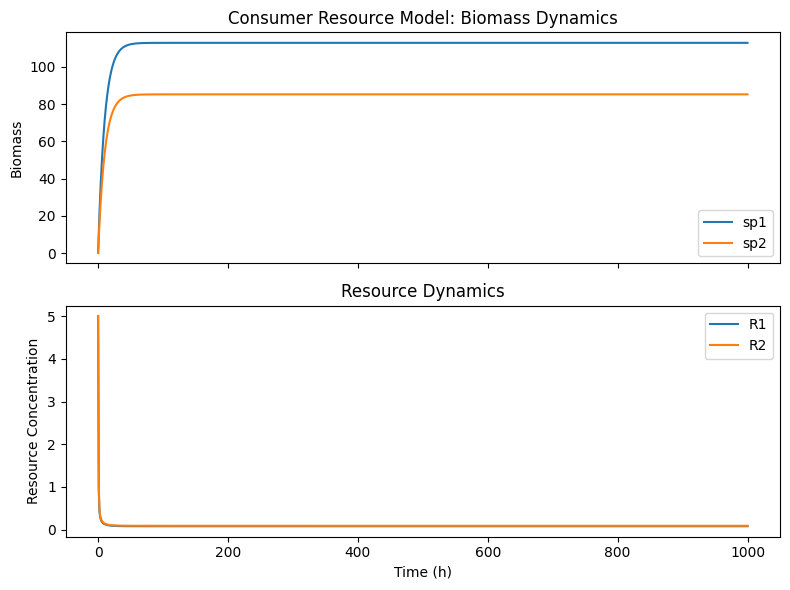

In [8]:
plot_crm_simulation(results)